In [1]:
import os
import io
import glob
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

In [2]:
# I got the URLs of the CSV files on GitHub
url = 'https://raw.githubusercontent.com/Ustacky-dev/Pandas-Analytics-Project/main/Abuja_Branch.csv'
url1 = 'https://raw.githubusercontent.com/Ustacky-dev/Pandas-Analytics-Project/main/Lagos_Branch.csv'
url2 = 'https://raw.githubusercontent.com/Ustacky-dev/Pandas-Analytics-Project/main/Port_Harcourt_Branch.csv'

# I read the CSV files from the URLs into DataFrames
df = pd.read_csv(io.StringIO(requests.get(url).content.decode('utf-8')))
df1 = pd.read_csv(io.StringIO(requests.get(url1).content.decode('utf-8')))
df2 = pd.read_csv(io.StringIO(requests.get(url2).content.decode('utf-8')))

# I concatenated the DataFrames into a single DataFrame
combined_df = pd.concat([df, df1, df2], axis=0, ignore_index=True)

# Display the resulting DataFrame
df3 = combined_df


In [3]:
df3.tail(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,148-41-7930,C,Port Harcourt,Normal,Male,Health and beauty,35985.6,7,12594.96,264494.16,1/23/2019,10:33,Cash,251899.2,4.761905,12594.96,6.1
996,189-40-5216,C,Port Harcourt,Normal,Male,Electronic accessories,34693.2,7,12142.62,254995.02,1/9/2019,11:40,Cash,242852.4,4.761905,12142.62,6.0
997,267-62-7380,C,Port Harcourt,Member,Male,Electronic accessories,29642.4,10,14821.20,311245.20,3/29/2019,19:12,Epay,296424.0,4.761905,14821.20,4.3
998,652-49-6720,C,Port Harcourt,Member,Female,Electronic accessories,21942.0,1,1097.10,23039.10,2/18/2019,11:40,Epay,21942.0,4.761905,1097.10,5.9
999,233-67-5758,C,Port Harcourt,Normal,Male,Health and beauty,14526.0,1,726.30,15252.30,1/29/2019,13:46,Epay,14526.0,4.761905,726.30,6.2


In [4]:
# To get the shape of the DataFrame
shape = df3.shape

# To get the number of rows and columns
num_rows = shape[0]
num_columns = shape[1]

# To print the results
print(f'The data has {num_rows} rows and {num_columns} columns.')


The data has 1000 rows and 17 columns.


In [5]:
# To get the column names
column_names = df3.columns

# Print the column names
print('Column names:')
for name in column_names:
    print(name)

Column names:
Invoice ID
Branch
City
Customer type
Gender
Product line
Unit price
Quantity
Tax 5%
Total
Date
Time
Payment
cogs
gross margin percentage
gross income
Rating


In [6]:
# Generate a statistical summary of the data
summary = df3.describe()

# Print the summary
print(summary)

         Unit price     Quantity        Tax 5%          Total           cogs  \
count   1000.000000  1000.000000   1000.000000    1000.000000    1000.000000   
mean   20041.966800     5.510000   5536.572840  116268.029640  110731.456800   
std     9538.066205     2.923431   4215.177173   88518.720636   84303.543463   
min     3628.800000     1.000000    183.060000    3844.260000    3661.200000   
25%    11835.000000     3.000000   2132.955000   44792.055000   42659.100000   
50%    19882.800000     5.000000   4351.680000   91385.280000   87033.600000   
75%    28056.600000     8.000000   8080.290000  169686.090000  161605.800000   
max    35985.600000    10.000000  17874.000000  375354.000000  357480.000000   

       gross margin percentage  gross income      Rating  
count             1.000000e+03   1000.000000  1000.00000  
mean              4.761905e+00   5536.572840     6.97270  
std               6.131498e-14   4215.177173     1.71858  
min               4.761905e+00    183.06000

In [7]:
df3.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.00000
mean,20041.966800,5.510000,5536.572840,116268.029640,110731.456800,4.761905e+00,5536.572840,6.97270
std,9538.066205,2.923431,4215.177173,88518.720636,84303.543463,6.131498e-14,4215.177173,1.71858
min,3628.800000,1.000000,183.060000,3844.260000,3661.200000,4.761905e+00,183.060000,4.00000
25%,11835.000000,3.000000,2132.955000,44792.055000,42659.100000,4.761905e+00,2132.955000,5.50000
50%,19882.800000,5.000000,4351.680000,91385.280000,87033.600000,4.761905e+00,4351.680000,7.00000
75%,28056.600000,8.000000,8080.290000,169686.090000,161605.800000,4.761905e+00,8080.290000,8.50000
max,35985.600000,10.000000,17874.000000,375354.000000,357480.000000,4.761905e+00,17874.000000,10.00000


# From the above there are few things to notice on the data analyzed.

1. The Standard Deviation for the unit prices show that there is a huge disparity between the lowest priced items and the expensive ones. It also shows that a greater quantity of the low priced items were sold.
2. The ratings are closely clustered around the mean.

<AxesSubplot:>

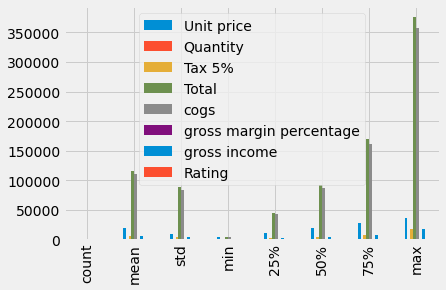

In [8]:
summary.plot.bar()

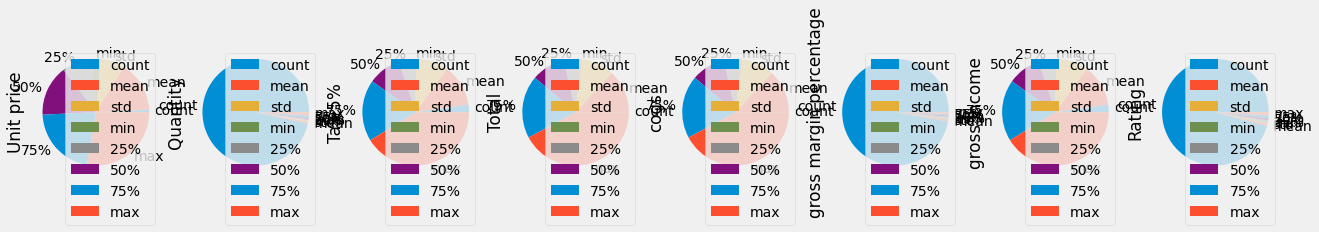

In [9]:
# Create a pie chart from the summary
summary.plot.pie(subplots=True, figsize=(20, 10))

# Show the plot
plt.show()

In [10]:

# def missing_data_summary(df3):

# Calculate the total missing values in each column
total_missing = df3.isnull().sum()

# Calculate the percentage of missing values in each column
percent_missing = (df3.isnull().sum() / len(df3)) * 100

# Create a summary dataframe
summary_df3 = pd.DataFrame({'Total Missing': total_missing, 'Percent Missing': percent_missing})

# Sort the summary dataframe by the total missing values in descending order
summary_df3 = summary_df3.sort_values(by='Total Missing', ascending=False)

# Print the summary dataframe
print(summary_df3)

                         Total Missing  Percent Missing
Invoice ID                           0              0.0
Total                                0              0.0
gross income                         0              0.0
gross margin percentage              0              0.0
cogs                                 0              0.0
Payment                              0              0.0
Time                                 0              0.0
Date                                 0              0.0
Tax 5%                               0              0.0
Branch                               0              0.0
Quantity                             0              0.0
Unit price                           0              0.0
Product line                         0              0.0
Gender                               0              0.0
Customer type                        0              0.0
City                                 0              0.0
Rating                               0          

In [11]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [12]:
# Convert the date column to a datetime object
df3['Date'] = pd.to_datetime(df3['Date'])

# Display the result
print(df3)

      Invoice ID Branch           City Customer type  Gender  \
0    692-92-5582      B          Abuja        Member  Female   
1    351-62-0822      B          Abuja        Member  Female   
2    529-56-3974      B          Abuja        Member    Male   
3    299-46-1805      B          Abuja        Member  Female   
4    319-50-3348      B          Abuja        Normal  Female   
..           ...    ...            ...           ...     ...   
995  148-41-7930      C  Port Harcourt        Normal    Male   
996  189-40-5216      C  Port Harcourt        Normal    Male   
997  267-62-7380      C  Port Harcourt        Member    Male   
998  652-49-6720      C  Port Harcourt        Member  Female   
999  233-67-5758      C  Port Harcourt        Normal    Male   

               Product line  Unit price  Quantity    Tax 5%      Total  \
0        Food and beverages     19742.4         3   2961.36   62188.56   
1       Fashion accessories      5212.8         4   1042.56   21893.76   
2    Elec

In [13]:
df3['Datetime'] = pd.to_datetime(df3['Date'].astype(str) + ' ' + df3['Time'].astype(str))

In [14]:
df3.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Datetime
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2019-02-20,13:27,Card,59227.2,4.761905,2961.36,5.9,2019-02-20 13:27:00
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2019-02-06,18:07,Epay,20851.2,4.761905,1042.56,4.5,2019-02-06 18:07:00


In [15]:
df3['Day'] = pd.to_datetime(df3['Date']).dt.day

In [16]:
df3['Month'] = pd.to_datetime(df3['Date']).dt.month

In [17]:
df3['Year'] = pd.to_datetime(df3['Date']).dt.year

In [18]:
df3['Hour'] = pd.to_datetime(df3['Date']).dt.hour

In [19]:
df3['Hour'] = pd.to_datetime(df3['Datetime']).dt.hour

# Getting the number of unique hours
num_unique_hours = df3['Hour'].nunique()

# Getting an array of the unique hours
unique_hours_array = df3['Hour'].unique()

# Printing the results
print('Number of unique hours:', num_unique_hours)
print('Unique hours:', unique_hours_array)

Number of unique hours: 11
Unique hours: [13 18 17 16 15 10 12 19 14 11 20]


In [20]:
# Get the unique sales hours
unique_hours = df3['Time'].unique()

# Print the result
print(unique_hours)

['13:27' '18:07' '17:03' '16:19' '15:30' '10:40' '12:20' '15:31' '19:48'
 '19:39' '12:43' '14:49' '13:01' '18:45' '13:03' '18:00' '17:24' '15:47'
 '12:45' '14:42' '11:49' '13:40' '14:35' '15:01' '18:17' '19:56' '17:55'
 '12:09' '10:25' '18:14' '18:19' '11:32' '12:44' '12:29' '15:26' '20:38'
 '17:26' '14:57' '11:15' '13:18' '18:36' '14:40' '12:21' '15:07' '19:20'
 '19:40' '13:58' '14:43' '19:18' '15:24' '14:12' '17:34' '12:04' '19:46'
 '19:00' '10:53' '10:39' '13:41' '20:23' '11:57' '14:51' '12:42' '19:42'
 '19:17' '13:24' '15:53' '18:27' '12:58' '18:59' '13:44' '13:46' '19:14'
 '10:52' '19:28' '13:52' '10:54' '18:31' '19:26' '18:42' '19:43' '19:06'
 '15:34' '19:22' '19:24' '20:55' '18:13' '16:52' '20:52' '18:01' '13:30'
 '17:37' '11:46' '16:46' '14:04' '19:53' '10:11' '18:48' '13:02' '18:23'
 '20:21' '11:06' '19:02' '14:16' '15:40' '16:58' '19:50' '13:32' '13:19'
 '10:26' '16:28' '10:43' '19:01' '13:00' '14:29' '17:13' '13:53' '17:27'
 '14:36' '19:35' '17:58' '20:07' '11:02' '19:07' '1

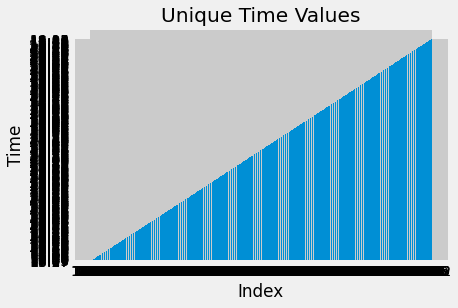

In [21]:
# Create a bar chart
plt.bar(range(len(unique_hours)), unique_hours)

# Set the x-axis tick labels to the unique values
plt.xticks(range(len(unique_hours)), unique_hours)

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Time')
plt.title('Unique Time Values')

# Show the chart
plt.show()

In [22]:
unique_values = df3['gross margin percentage'].unique()
print(unique_values)
value_counts = df3['Payment'].value_counts()
print(value_counts)

[4.76190476]
Epay    345
Cash    344
Card    311
Name: Payment, dtype: int64


In [23]:
#Example - Uncomment the Code and Run it
df3['Payment'].unique().tolist()

['Card', 'Epay', 'Cash']

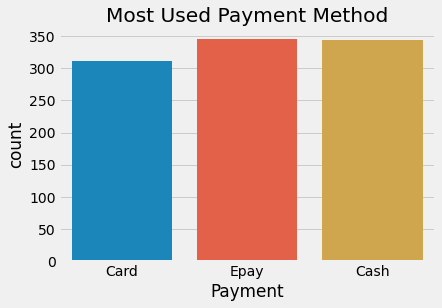

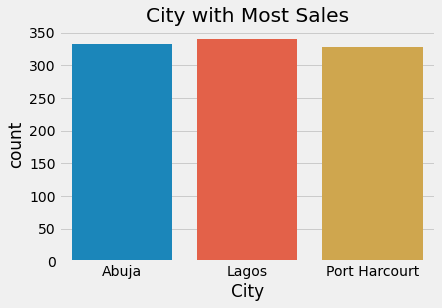

In [24]:
# Create a countplot of the 'Payment' column
sns.countplot(x='Payment', data=df3)
plt.title('Most Used Payment Method')
plt.show()

# Create a countplot of the 'City' column
sns.countplot(x='City', data=df3)
plt.title('City with Most Sales')
plt.show()

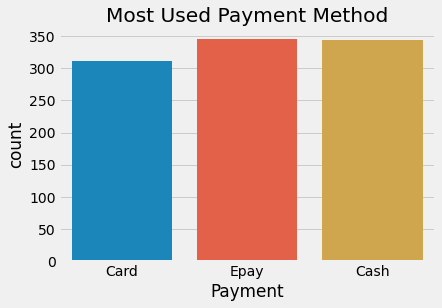

In [25]:
# Creating a count plot
ax = sns.countplot(x='Payment', data=df3)

# Adding a title to the plot
ax.set_title('Most Used Payment Method')

# Displaying the plot
plt.show()


In [26]:
# Get the unique values in the 'Category' column
unique_values = df3['Customer type'].unique()

# Print the result
print(unique_values)

['Member' 'Normal']


In [27]:
# Get the counts of unique values in the 'Category' column
value_counts = df3['Customer type'].value_counts()

# Print the result
print(value_counts)

Member    501
Normal    499
Name: Customer type, dtype: int64


In [28]:
#Uncomment the code and Run it
categorical_columns = [col for col in df3.columns if df3[col].dtype == "object" ]
print(categorical_columns)

['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Time', 'Payment']


In [29]:
# Group by item and location and calculate total sales
grouped_df = df3.groupby(['Product line', 'City']).sum()

# Sort by sales in descending order
sorted_df = grouped_df.sort_values(by='Quantity', ascending = False)

# Display the result
print(sorted_df)

                                      Unit price  Quantity     Tax 5%  \
Product line           City                                             
Home and lifestyle     Lagos           1306789.2       371  384294.78   
Food and beverages     Port Harcourt   1360807.2       369  407431.80   
Fashion accessories    Port Harcourt   1397822.4       342  369601.20   
Electronic accessories Port Harcourt   1105027.2       333  325182.42   
Sports and travel      Lagos           1181163.6       333  332103.42   
                       Abuja           1332014.4       322  342654.84   
Electronic accessories Lagos           1185217.2       322  314007.66   
Health and beauty      Abuja           1110182.4       320  342525.60   
Electronic accessories Abuja            987112.8       316  292310.46   
Food and beverages     Lagos           1147867.2       313  294224.58   
Fashion accessories    Abuja           1224115.2       297  281371.14   
Home and lifestyle     Abuja            999252.0   

In [30]:
grouped_data = df3.groupby('Product line')['gross income'].sum()

# Find the item with the highest sales amount
highest_grossing_item = grouped_data.idxmax()

print(highest_grossing_item)

Food and beverages


In [31]:
# Calculate the total gross income for each item
total_gross_income = df3.groupby('Product line')['gross income'].sum()
print(total_gross_income)

# Find the item with the highest total gross income
max_item = total_gross_income.idxmax()
max_value = total_gross_income.max()

# Create a DataFrame with the result
result = pd.DataFrame({'Product line': [max_item], 'Total Gross Income': [max_value]})

# Display the result as a table
display(result)

Product line
Electronic accessories    931500.54
Fashion accessories       930958.20
Food and beverages        962483.04
Health and beauty         843321.24
Home and lifestyle        923347.08
Sports and travel         944962.74
Name: gross income, dtype: float64


,Product line,Total Gross Income
0,Food and beverages,962483.04


In [32]:
# Group the DataFrame by the 'Column' column and apply the sum and mean aggregation functions
result = df3.groupby('Branch').agg({'gross income': ['sum', 'mean'], 'gross margin percentage': ['sum', 'mean']})

# Print the result
print(result)

       gross income              gross margin percentage          
                sum         mean                     sum      mean
Branch                                                            
A        1820577.78  5354.640529             1619.047619  4.761905
B        1820531.52  5483.528675             1580.952381  4.761905
C        1895463.54  5778.852256             1561.904762  4.761905


In [33]:
# Calculate the total gross income for each item
total_gross_income = df3.groupby('Branch')['gross income'].sum()

# Find the item with the highest total gross income
max_item = total_gross_income.idxmax()
max_value = total_gross_income.max()

# Create a DataFrame with the result
result = pd.DataFrame({'Branch': [max_item], 'Total Gross Income': [max_value]})

# Display the result as a table
display(result)

,Branch,Total Gross Income
0,C,1895463.54


In [34]:
# Grouping the data by city and calculating the total gross income for each city
gross_income_by_city = df3.groupby('City')['gross income'].sum()

# Displaying the results as a table
print(gross_income_by_city.to_frame())

# Determining the city with the highest total gross income
highest_gross_income_city = gross_income_by_city.idxmax()
print('City with the highest total gross income:', highest_gross_income_city)


               gross income
City                       
Abuja            1820531.52
Lagos            1820577.78
Port Harcourt    1895463.54
City with the highest total gross income: Port Harcourt


gross income Summary:
count     1000.000000
mean      5536.572840
std       4215.177173
min        183.060000
25%       2132.955000
50%       4351.680000
75%       8080.290000
max      17874.000000
Name: gross income, dtype: float64
Quantity Summary:
count    1000.000000
mean        5.510000
std         2.923431
min         1.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: Quantity, dtype: float64


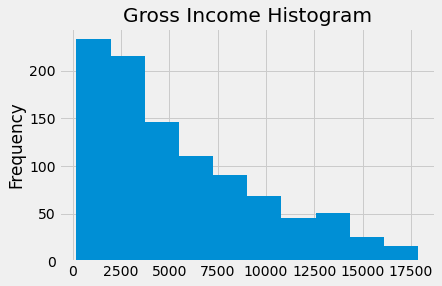

In [35]:
# Get summary statistics for the 'Unit Price' column
gross_income_summary = df3['gross income'].describe()
print('gross income Summary:')
print(gross_income_summary)

# Get summary statistics for the 'Quantity' column
quantity_summary = df3['Quantity'].describe()
print('Quantity Summary:')
print(quantity_summary)

# Plot a histogram of the 'Unit Price' column
df3['gross income'].plot.hist(title='Gross Income Histogram')
plt.show()

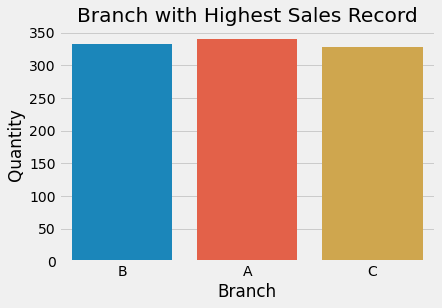

In [36]:
# Create a countplot of the 'Branch' column
sns.countplot(x='Branch', data=df3)

# Add labels and title
plt.xlabel('Branch')
plt.ylabel('Quantity')
plt.title('Branch with Highest Sales Record')

# Show the plot
plt.show()

In [37]:
# Group the data by branch and month and calculate the sum of sales for each group
grouped = df3.groupby(['Branch', 'Month'])['Quantity'].sum().reset_index()

# Find the month with the highest sales total for each branch
result = grouped.loc[grouped.groupby('Branch')['Quantity'].idxmax()]

print(result)

  Branch  Month  Quantity
0      A      1       685
4      B      2       624
6      C      1       680


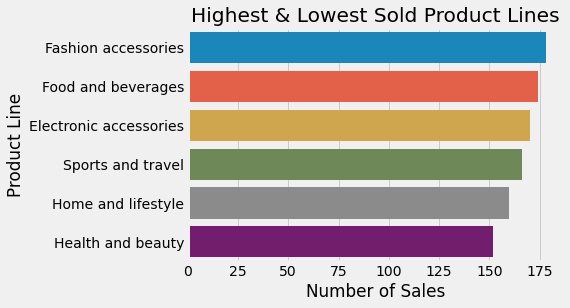

In [38]:
# Create a countplot of the 'Product line' column
sns.countplot(y='Product line', data=df3, order=df3['Product line'].value_counts().index)

# Add labels and title
plt.xlabel('Number of Sales')
plt.ylabel('Product Line')
plt.title('Highest & Lowest Sold Product Lines')

# Show the plot
plt.show()

In [39]:
# Group the dataframe by Location
grouped_df3 = df3.groupby('City')

# Find the most and least sold items per location
most_sold = grouped_df3.apply(lambda x: x.loc[x['Quantity'].idxmax()])
least_sold = grouped_df3.apply(lambda x: x.loc[x['Quantity'].idxmin()])

# Print the results
print('Most sold items per location:')
print(most_sold[['City', 'Product line', 'Quantity']])

print('\nLeast sold items per location:')
print(least_sold[['City', 'Product line', 'Quantity']])

Most sold items per location:
                        City        Product line  Quantity
City                                                      
Abuja                  Abuja   Health and beauty        10
Lagos                  Lagos  Food and beverages        10
Port Harcourt  Port Harcourt  Home and lifestyle        10

Least sold items per location:
                        City         Product line  Quantity
City                                                       
Abuja                  Abuja  Fashion accessories         1
Lagos                  Lagos    Health and beauty         1
Port Harcourt  Port Harcourt    Sports and travel         1


In [40]:
# Group the dataframe by Location
grouped_df3 = df3.groupby('City')

# Find the highest and lowest sold items per location
highest_sold = grouped_df3.apply(lambda x: x.loc[x['Quantity'].idxmax()])
lowest_sold = grouped_df3.apply(lambda x: x.loc[x['Quantity'].idxmin()])

# Print the results
print('Highest sold items per City:', (sum))
print(highest_sold[['City', 'Product line', 'Quantity']])

print('\nLowest sold items per City:', (sum))
print(lowest_sold[['City', 'Product line', 'Quantity']])

Highest sold items per City: <built-in function sum>
                        City        Product line  Quantity
City                                                      
Abuja                  Abuja   Health and beauty        10
Lagos                  Lagos  Food and beverages        10
Port Harcourt  Port Harcourt  Home and lifestyle        10

Lowest sold items per City: <built-in function sum>
                        City         Product line  Quantity
City                                                       
Abuja                  Abuja  Fashion accessories         1
Lagos                  Lagos    Health and beauty         1
Port Harcourt  Port Harcourt    Sports and travel         1


In [41]:
# Calculate the total number of each item sold per location
result = df3.groupby('Product line').sum()

# Display the result
print(result)

                        Unit price  Quantity     Tax 5%        Total  \
Product line                                                           
Electronic accessories   3277357.2       971  931500.54  19561511.34   
Fashion accessories      3662406.0       902  930958.20  19550122.20   
Food and beverages       3508394.4       952  962483.04  20212143.84   
Health and beauty        3001636.8       854  843321.24  17709746.04   
Home and lifestyle       3186255.6       911  923347.08  19390288.68   
Sports and travel        3405916.8       920  944962.74  19844217.54   

                              cogs  gross margin percentage  gross income  \
Product line                                                                
Electronic accessories  18630010.8               809.523810     931500.54   
Fashion accessories     18619164.0               847.619048     930958.20   
Food and beverages      19249660.8               828.571429     962483.04   
Health and beauty       16866424.8    

In [42]:
df3.head(1)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Payment,cogs,gross margin percentage,gross income,Rating,Datetime,Day,Month,Year,Hour
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,...,Card,59227.2,4.761905,2961.36,5.9,2019-02-20 13:27:00,20,2,2019,13


In [43]:
grouped_df3 = df3.groupby(['Branch', 'Product line']).sum().reset_index()

# Pivot the dataframe to get the total quantity of each item per location
pivot_df = grouped_df3.pivot(index='Product line', columns='Branch', values='gross income')

# Print the results
print(pivot_df)

Branch                          A          B          C
Product line                                           
Electronic accessories  314007.66  292310.46  325182.42
Fashion accessories     279985.86  281371.14  369601.20
Food and beverages      294224.58  260826.66  407431.80
Health and beauty       215961.48  342525.60  284834.16
Home and lifestyle      384294.78  300842.82  238209.48
Sports and travel       332103.42  342654.84  270204.48


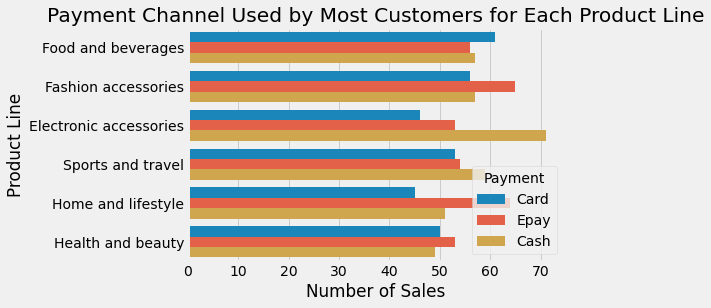

In [44]:
# Create a countplot with 'Product line' on the Y-axis and 'Payment' as hue
sns.countplot(y='Product line', hue='Payment', data=df3)

# Add labels and title
plt.xlabel('Number of Sales')
plt.ylabel('Product Line')
plt.title('Payment Channel Used by Most Customers for Each Product Line')

# Show the plot
plt.show()

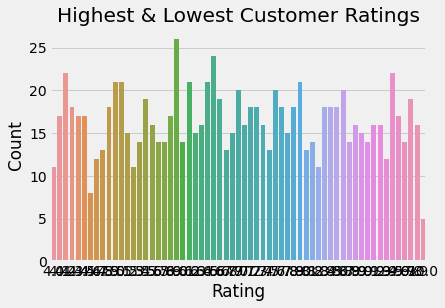

In [45]:
# Create a countplot of the 'Rating' column
sns.countplot(x='Rating', data=df3)

# Add labels and title
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Highest & Lowest Customer Ratings')

# Show the plot
plt.show()


In [46]:
# Create a boolean mask indicating which values are not missing
mask = df3.notna()

# Use the mask to access the non-missing values
non_missing_values = df3[mask]

# Display the result
print(non_missing_values)

      Invoice ID Branch           City Customer type  Gender  \
0    692-92-5582      B          Abuja        Member  Female   
1    351-62-0822      B          Abuja        Member  Female   
2    529-56-3974      B          Abuja        Member    Male   
3    299-46-1805      B          Abuja        Member  Female   
4    319-50-3348      B          Abuja        Normal  Female   
..           ...    ...            ...           ...     ...   
995  148-41-7930      C  Port Harcourt        Normal    Male   
996  189-40-5216      C  Port Harcourt        Normal    Male   
997  267-62-7380      C  Port Harcourt        Member    Male   
998  652-49-6720      C  Port Harcourt        Member  Female   
999  233-67-5758      C  Port Harcourt        Normal    Male   

               Product line  Unit price  Quantity    Tax 5%      Total  ...  \
0        Food and beverages     19742.4         3   2961.36   62188.56  ...   
1       Fashion accessories      5212.8         4   1042.56   21893.76  .

In [47]:
df3.head(1)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Payment,cogs,gross margin percentage,gross income,Rating,Datetime,Day,Month,Year,Hour
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,...,Card,59227.2,4.761905,2961.36,5.9,2019-02-20 13:27:00,20,2,2019,13


In [48]:
df3['Rating'].describe()

count    1000.00000
mean        6.97270
std         1.71858
min         4.00000
25%         5.50000
50%         7.00000
75%         8.50000
max        10.00000
Name: Rating, dtype: float64

In [51]:
highest_rating = df3['Rating'].min()
highest_rated_items = df3[df3['Rating'] == highest_rating]

print(highest_rated_items)


      Invoice ID Branch           City Customer type  Gender  \
24   510-95-6347      B          Abuja        Member  Female   
73   836-82-5858      B          Abuja        Member    Male   
99   730-61-8757      B          Abuja        Member    Male   
115  182-69-8360      B          Abuja        Normal  Female   
223  576-31-4774      B          Abuja        Normal  Female   
540  828-46-6863      A          Lagos        Member    Male   
594  651-96-5970      A          Lagos        Normal    Male   
701  730-50-9884      C  Port Harcourt        Normal  Female   
885  131-15-8856      C  Port Harcourt        Member  Female   
953  845-94-6841      C  Port Harcourt        Member  Female   
961  885-56-0389      C  Port Harcourt        Member    Male   

               Product line  Unit price  Quantity    Tax 5%      Total  ...  \
24       Food and beverages     17467.2         3   2620.08   55021.68  ...   
73        Health and beauty     24973.2         9  11237.94  235996.74  .